# Traffic sign classification ptoblem

In [1]:
from IPython.display import YouTubeVideo

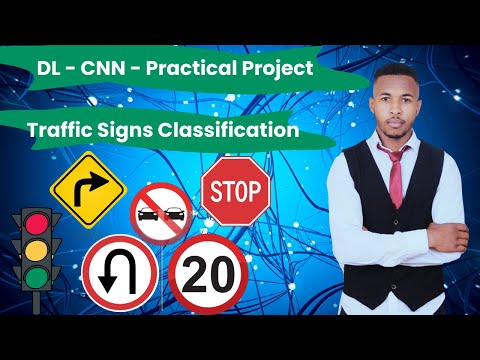

In [3]:
YouTubeVideo('oHYM43BKT5E', width=800, height=450)

## load the labels

In [56]:
import pandas as pd
pd.read_csv('Dataset/labels.csv')

,ClassId,Name
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


In [57]:
#ignoring the warnings while executing codes
import warnings
warnings.filterwarnings("ignore")

## Libraries inportation

In [58]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns

In [5]:
# define dataset path
dir_path = 'Dataset'

In [64]:
os.getcwd()

'C:\\Users\\NITRO\\Desktop\\AI course\\Deep Learning'

In [67]:
os.listdir(dir_path)

['extract.py',
 'labels.csv',
 'Meta',
 'Meta.csv',
 'model_trained.p',
 'myData',
 'Test',
 'Test.csv',
 'Train',
 'Train.csv']

## Assigning the path for train and test images

In [68]:
train_path = dir_path +'/Train'
test_path = dir_path + '/Test'

In [69]:
print(os.listdir(train_path))

['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '5', '6', '7', '8', '9']


In [70]:
sorted(os.listdir(test_path))

['00000.png',
 '00001.png',
 '00002.png',
 '00003.png',
 '00004.png',
 '00005.png',
 '00006.png',
 '00007.png',
 '00008.png',
 '00009.png',
 '00010.png',
 '00011.png',
 '00012.png',
 '00013.png',
 '00014.png',
 '00015.png',
 '00016.png',
 '00017.png',
 '00018.png',
 '00019.png',
 '00020.png',
 '00021.png',
 '00022.png',
 '00023.png',
 '00024.png',
 '00025.png',
 '00026.png',
 '00027.png',
 '00028.png',
 '00029.png',
 '00030.png',
 '00031.png',
 '00032.png',
 '00033.png',
 '00034.png',
 '00035.png',
 '00036.png',
 '00037.png',
 '00038.png',
 '00039.png',
 '00040.png',
 '00041.png',
 '00042.png',
 '00043.png',
 '00044.png',
 '00045.png',
 '00046.png',
 '00047.png',
 '00048.png',
 '00049.png',
 '00050.png',
 '00051.png',
 '00052.png',
 '00053.png',
 '00054.png',
 '00055.png',
 '00056.png',
 '00057.png',
 '00058.png',
 '00059.png',
 '00060.png',
 '00061.png',
 '00062.png',
 '00063.png',
 '00064.png',
 '00065.png',
 '00066.png',
 '00067.png',
 '00068.png',
 '00069.png',
 '00070.png',
 '0007

## appear some images randomly

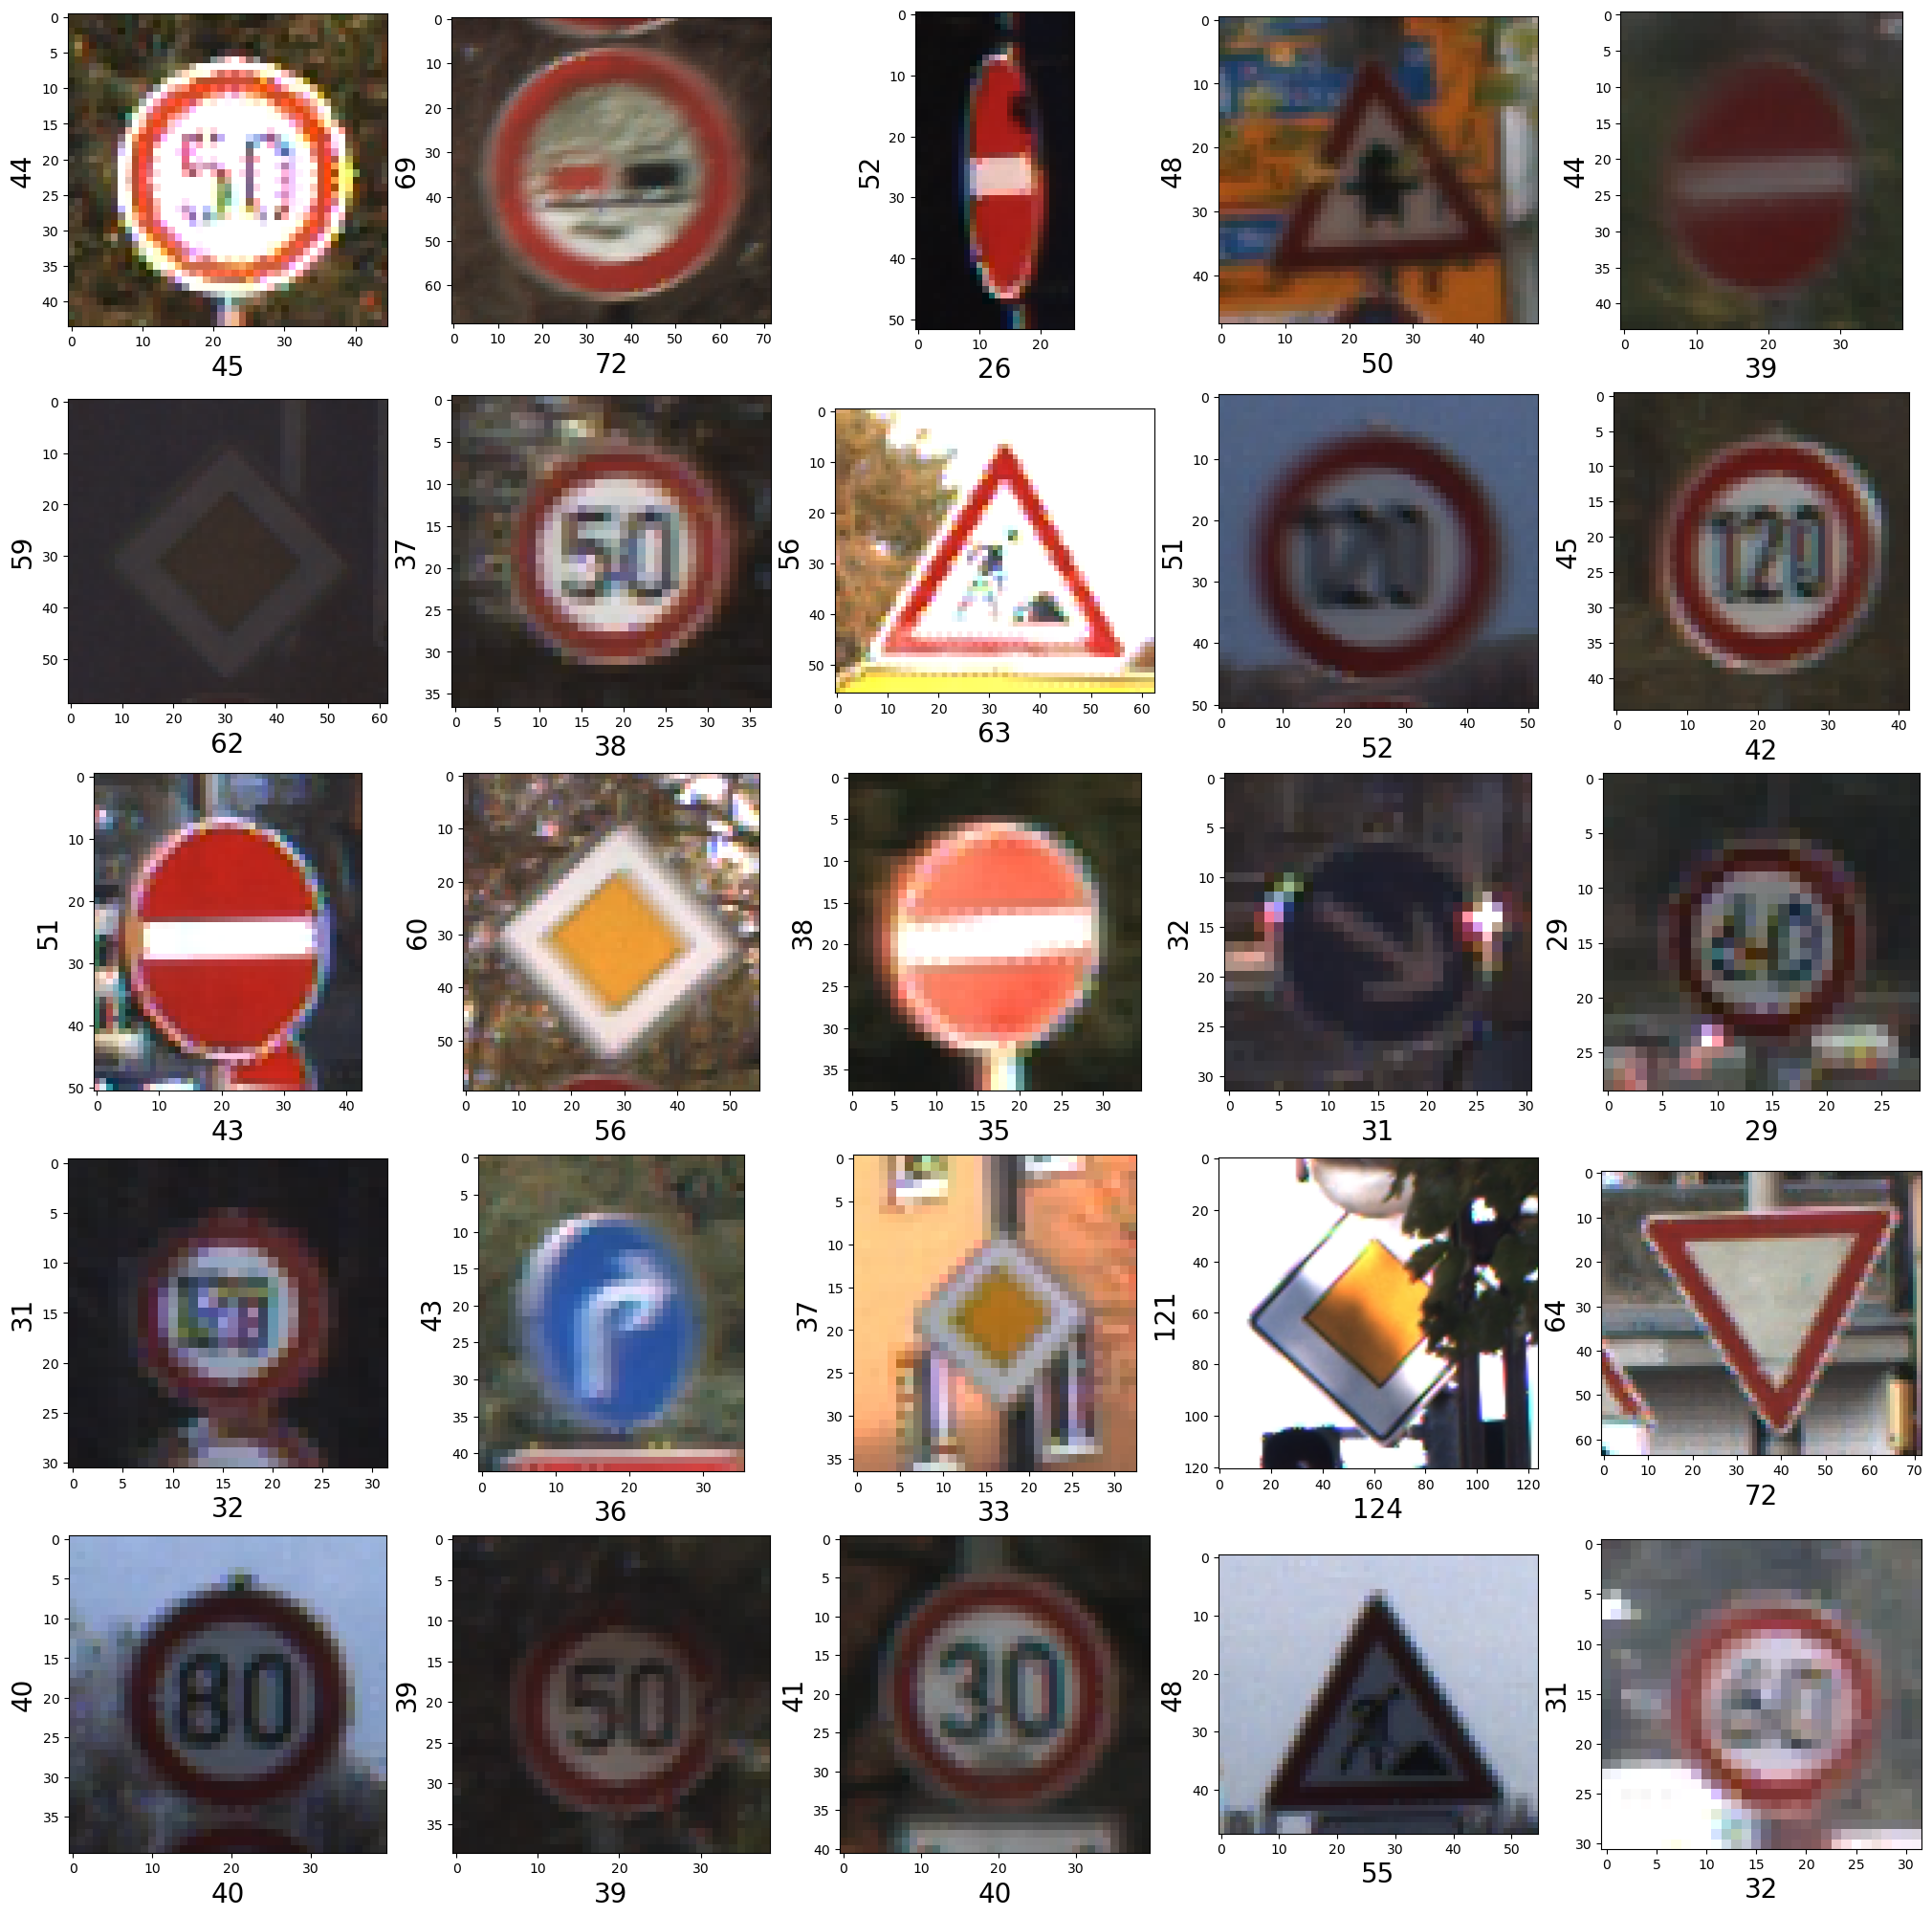

In [73]:
import random

images_path = os.listdir(test_path)

plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path = test_path +'/'+ random.choice(images_path)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image

## Check the global shape of images in dataset

In [38]:
dim1 = []
dim2 = []

for i in range(0,43):
    labels = train_path + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = imread(labels + '/' + x)
        dim1.append(img.shape[0])
        dim2.append(img.shape[1])

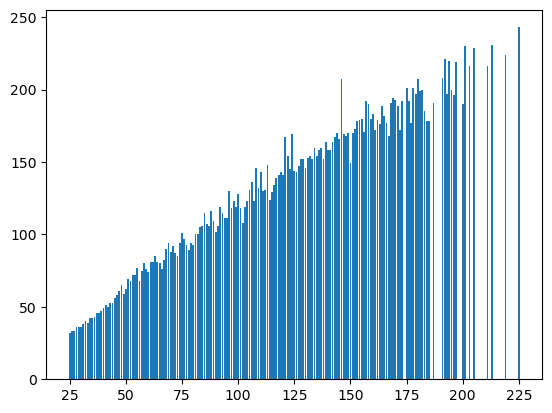

In [52]:
plt.bar(dim1,dim2)
plt.show()

In [53]:
np.mean(dim1)

50.328929582493814

In [74]:
np.mean(dim2)

50.83587951745773

In [75]:
image_shape = (50,50)

## get each image path in images[], and all the label ids in label_id[]

In [81]:
from PIL import Image

images = []
label_id = []

for i in range(43):
#     labels = train_path + '/{0}'.format(i)
    labels = f"{train_path}/{i}"

    image_path = os.listdir(labels)
    for x in image_path:
        img = Image.open(labels + '/' + x)
        img = img.resize(image_shape)
        img = np.array(img)
        images.append(img)
        label_id.append(i)

In [82]:
#Converting images into numpy array
images = np.array(images)
#The pixel value of each image ranges between 0 and 255
#Dividing each image by 255 will scale the values between 0 and 1. This is also known as normalization.
images = images/255 

In [83]:
label_id = np.array(label_id)
label_id.shape

(39209,)

In [84]:
images.shape

(39209, 50, 50, 3)

# show the distribution of data {images}

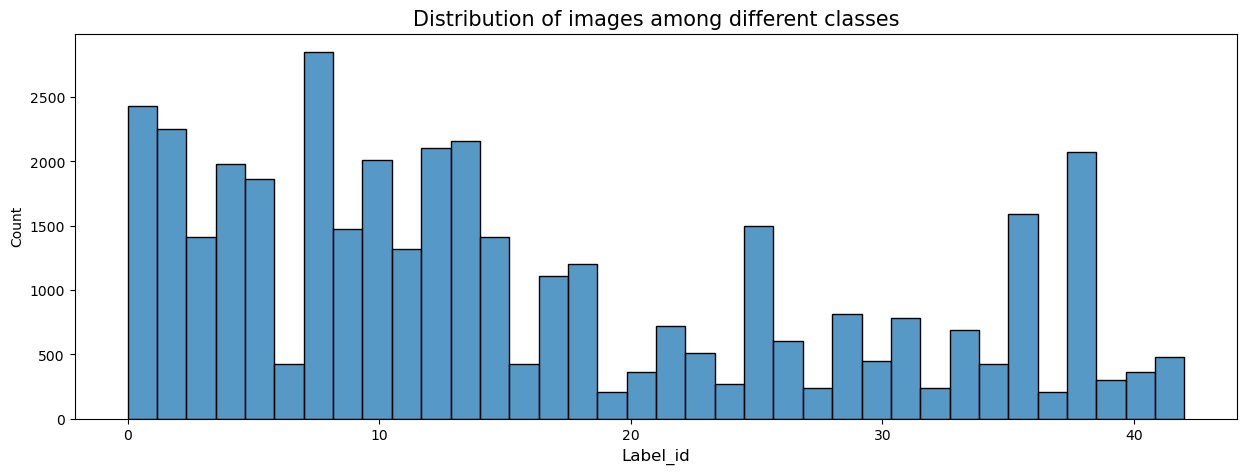

In [85]:
plt.figure(figsize=(15,5))
sns.histplot(label_id)
plt.title('Distribution of images among different classes', fontsize = 15)
plt.xlabel('Label_id', fontsize=12)
plt.show()

In [88]:
#Saving the scaled images and labels for future use
np.save('Training_set', images)
np.save('Label_Id', label_id)

In [89]:
import numpy as np
import pandas as pd

In [90]:
images = np.load('Training_set.npy')
label_id = np.load('Label_Id.npy')

## split the data

In [91]:
#Splitting the data
from sklearn.model_selection import  train_test_split
x_train, x_val, y_train, y_val = train_test_split(images, label_id , test_size = 0.2, random_state = 42)

## transform ids to categories

In [92]:
#keras has a built-in function for one-hot encoding.
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train)

y_val_cat = to_categorical(y_val)

In [93]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D

## Define cnn arch

In [94]:
model = Sequential()

#1st layer
model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = x_train.shape[1:], activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

#2nd layer
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

#3rd layer
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

#Dense layer
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))

#Output layer
model.add(Dense(43, activation = 'softmax'))

In [95]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [96]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 25, 25, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 25, 25, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 11, 11, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 11, 11, 64)        0

## define early stopping calback and train the model

In [97]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 2)

model.fit(
    x_train, y_train,
    epochs = 25,
    batch_size = 64,
    validation_data = (x_val, y_val),
    callbacks = [early_stopping],
    verbose = 2
)

Epoch 1/25


491/491 - 44s - loss: 2.6570 - accuracy: 0.2527 - val_loss: 1.6527 - val_accuracy: 0.5167 - 44s/epoch - 89ms/step
Epoch 2/25
491/491 - 37s - loss: 1.3915 - accuracy: 0.5493 - val_loss: 0.6977 - val_accuracy: 0.7990 - 37s/epoch - 76ms/step
Epoch 3/25
491/491 - 38s - loss: 0.8404 - accuracy: 0.7224 - val_loss: 0.3157 - val_accuracy: 0.9310 - 38s/epoch - 78ms/step
Epoch 4/25
491/491 - 38s - loss: 0.5995 - accuracy: 0.8036 - val_loss: 0.2223 - val_accuracy: 0.9510 - 38s/epoch - 78ms/step
Epoch 5/25
491/491 - 78s - loss: 0.4674 - accuracy: 0.8462 - val_loss: 0.1518 - val_accuracy: 0.9685 - 78s/epoch - 159ms/step
Epoch 6/25
491/491 - 101s - loss: 0.3987 - accuracy: 0.8705 - val_loss: 0.1015 - val_accuracy: 0.9765 - 101s/epoch - 206ms/step
Epoch 7/25
491/491 - 73s - loss: 0.3429 - accuracy: 0.8889 - val_loss: 0.0990 - val_accuracy: 0.9823 - 73s/epoch - 149ms/step
Epoch 8/25
491/491 - 40s - loss: 0.3045 - accuracy: 0.9005 - val_loss: 0.0655 - val_accuracy: 0.9833 - 40s/epoch - 81m

In [99]:
#Saving the model
model.save('Model.h5')

<Axes: >

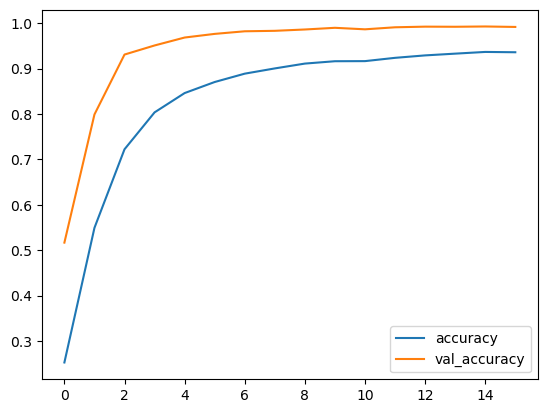

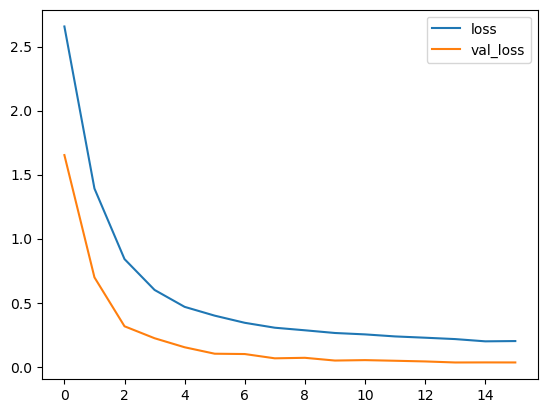

In [100]:
evaluation = pd.DataFrame(model.history.history)

evaluation[['accuracy', 'val_accuracy']].plot()
evaluation[['loss', 'val_loss']].plot()

In [101]:
from tensorflow.keras.models import load_model
model = load_model('Model.h5')

In [102]:
test_path = './Dataset/Test'
test_img = sorted(os.listdir(test_path))

In [103]:
#defining a function that will scale images
from PIL import Image

def scaling(test_images, test_path):
    images = []

    image_path = test_images
    
    for x in image_path:
        img = Image.open(test_path + '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)

    #Converting images into numpy array
    images = np.array(images)
    #The pixel value of each image ranges between 0 and 255
    #Dividing each image by 255 will scale the values between 0 and 1. This is also known as normalization.
    images = images/255

    return images

In [104]:
test_images = scaling(test_img,test_path)

In [105]:
test = pd.read_csv('Dataset/Test.csv')

y_test = test['ClassId'].values

y_test

array([16,  1, 38, ...,  6,  7, 10], dtype=int64)

In [108]:
# y_pred = model.predict(test_images)
# y_pred

In [107]:
# from sklearn.metrics import classification_report
# print(classification_report(y_test,y_pred))

395/395 [==============================] - 5s 12ms/step


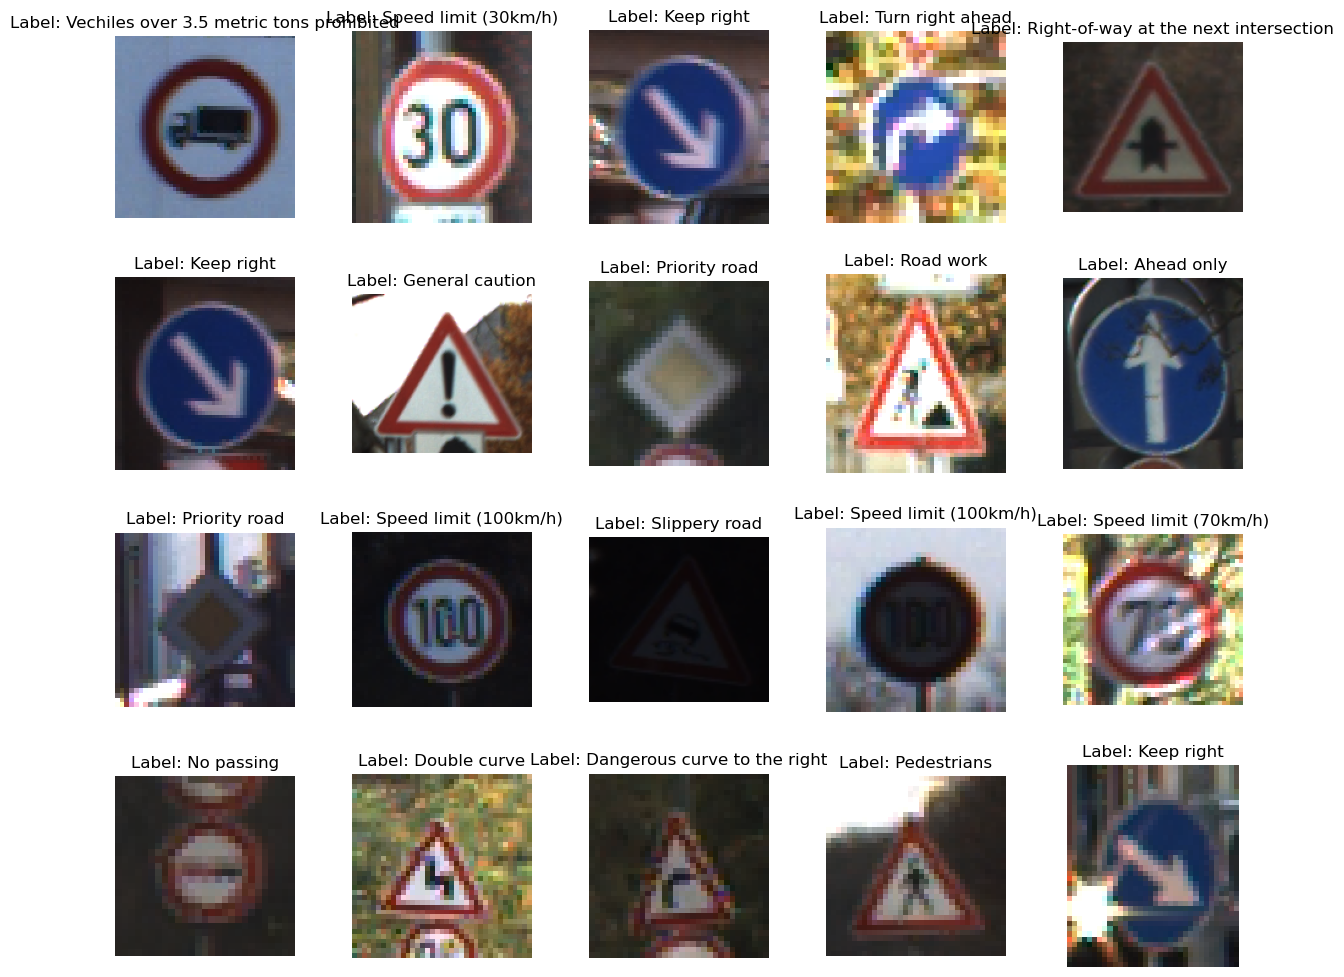

In [109]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.models import load_model
import pandas as pd

# Load the CSV file that contains the label names
labels_df = pd.read_csv('./Dataset/labels.csv')

# Create a dictionary to map IDs to label names
label_dict = pd.Series(labels_df['Name'].values, index=labels_df['ClassId']).to_dict()

# Load the pre-trained model
model = load_model('Model.h5')

# Define the path to your test images
test_path = './Dataset/Test'
test_images = os.listdir(test_path)  # Get all image filenames in the test folder

# Function to scale images (same as the one you defined)
def scaling(test_images, test_path):
    images = []
    
    for x in test_images:
        img = Image.open(test_path + '/' + x)
        img = img.resize((50, 50))  # Resize to the size your model expects
        img = np.array(img)
        images.append(img)

    images = np.array(images)
    images = images / 255.0  # Normalize between 0 and 1
    return images

# Preprocess the test images
scaled_images = scaling(test_images, test_path)

# Predict using the model
predictions = model.predict(scaled_images)
predicted_classes = np.argmax(predictions, axis=1)

# Set up the figure for displaying 20 images
fig, axes = plt.subplots(4, 5, figsize=(12, 10))  # Create a 4x5 grid (for 20 images)
fig.tight_layout()

# Plot 20 images and their predicted labels
for i, ax in enumerate(axes.flat[:20]):
    if i < len(test_images):
        # Load the original image (not scaled)
        img = Image.open(test_path + '/' + test_images[i])
        ax.imshow(img)
        
        # Get the predicted label name
        predicted_label_name = label_dict.get(predicted_classes[i], "Unknown")
        
        # Set the title as the predicted label
        ax.set_title(f"Label: {predicted_label_name}")
        
        # Remove the axes
        ax.axis('off')

# Display the grid of images
plt.show()


In [111]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from PIL import Image
import pandas as pd

# Load the CSV file that contains the label names
labels_df = pd.read_csv('./Dataset/labels.csv')

# Create a dictionary to map IDs to label names
label_dict = pd.Series(labels_df['Name'].values, index=labels_df['ClassId']).to_dict()

# Load the pre-trained model
model = load_model('Model.h5')  # Replace with your model path

# Function to preprocess the captured frame (resize, normalize)
def preprocess_frame(frame):
    img = Image.fromarray(frame)  # Convert OpenCV image (numpy array) to PIL image
    img = img.resize((50, 50))    # Resize to match the model's input size (adjust if necessary)
    img = np.array(img)            # Convert back to a numpy array
    img = img / 255.0              # Normalize pixel values between 0 and 1
    img = np.expand_dims(img, axis=0)  # Expand dimensions to match model input (1, 50, 50, 3)
    return img

# Open the webcam
cap = cv2.VideoCapture(0)

# Real-time prediction loop
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    if not ret:
        break
    
    # Preprocess the frame for prediction
    processed_frame = preprocess_frame(frame)
    
    # Predict using the model
    predictions = model.predict(processed_frame)
    predicted_class_id = np.argmax(predictions, axis=1)[0]  # Get the class with the highest probability
    
    # Convert predicted class ID to label name using the dictionary
    predicted_label_name = label_dict.get(predicted_class_id, "Unknown")
    
    # Display the predicted label name on the frame
    label = f"Predicted Label: {predicted_label_name}"
    cv2.putText(frame, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    
    # Show the frame with the prediction
    cv2.imshow('Real-Time Prediction', frame)
    
    # Press 'q' to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture and close windows
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 38ms/step
